<a href="https://www.kaggle.com/code/prajwallandge/grocery-store-sales-solution?scriptVersionId=163597140" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<link rel="stylesheet" href="https://fonts.googleapis.com/css2?family=Poppins:wght@400;700&display=swap">

<div style="padding: 20px; text-align: center; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); background-color: #ffffff; font-family: 'Poppins', sans-serif;">
    <img src="https://i.imgur.com/s3rXaUu.jpg" alt="Logo" style="width: 120px; height: 120px; border-radius: 50%; margin-right: 20px; float: left; object-fit: cover;">
    <div style="float: left; text-align: left; color: #333333;">
        <h1 style="margin-bottom: 10px; font-size: 28px; font-weight: bold; color: #20BEFF;">Unlock Your AI Career with AI Adventures</h1>
        <h3 style="font-size: 18px;">Explore the Future of Data Science and AI</h3>
        <p style="font-size: 14px; color: #555555; margin-bottom: 20px;">Build your skills with hands-on learning and gain job-ready expertise at AI Adventures – Pune’s Premier Institute for AI Education.</p>
        <div style="margin-top: 10px;">
            <a href="https://www.aiadventures.in/" style="text-decoration: none; background-color: #20BEFF; color: #ffffff; padding: 10px 20px; border-radius: 5px; font-weight: bold;">Get Started</a>
        </div>
        <p style="font-size: 14px; color: #555555; margin-top: 20px;">Join us in shaping the future of AI together!</p>
    </div>
    <div style="clear: both;"></div>
</div>


<h1 style="margin-bottom: 10px; font-size: 28px; font-weight: bold; color: #20BEFF;">Grocery Store Sales Data Analysis</h1>

<h2 style="margin-bottom: 10px; color: #20BEFF;">Overview</h2>
<p style="font-size: 14px; color: #555555; margin-bottom: 20px;">This Project is centered around analyzing sales data from a chain of grocery stores in Maharashtra. By examining various parameters such as item categories, sales volume, profit margins, and customer ratings, we aim to glean insights that can aid in optimizing inventory management and sales strategies.</p>

<h2 style="margin-bottom: 10px; color: #20BEFF;">Objective</h2>
<p style="font-size: 14px; color: #555555; margin-bottom: 20px;">The goal is to identify trends in sales data that will inform better inventory decisions, highlight profitable items, and understand customer preferences.</p>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all f/iles under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales-dataset-eda/Grocery_sales_dataset.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
custom_palette = ["skyblue", "lightgreen", "lightblue", "lightpink", "lavender", "lightsalmon", "lightsteelblue"]
sns.set_palette(custom_palette)

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Import and read dataset.<p>

In [3]:
df = pd.read_csv("/kaggle/input/grocery-sales-dataset-eda/Grocery_sales_dataset.csv",index_col=0)
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men


<h2 style="margin-bottom: 10px; color: #20BEFF;">Data Exploration</h2>

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Display the first few rows of the DataFrame.<p>

In [4]:
df.head()

,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men


<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Display information about a DataFrame including the index dtype and columns, non-null values and memory usage.<p>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22321 entries, 0 to 22320
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   product_name          22321 non-null  object
 1   category              22321 non-null  object
 2   price                 22321 non-null  int64 
 3   sales_date            22321 non-null  object
 4   day_of_week           22321 non-null  object
 5   holiday               22321 non-null  bool  
 6   number_of_items_sold  22321 non-null  int64 
 7   total_revenue         22321 non-null  int64 
 8   sales_time            22321 non-null  object
 9   product_id            22321 non-null  int64 
 10  buyer_gender          22321 non-null  object
dtypes: bool(1), int64(4), object(6)
memory usage: 1.9+ MB


<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Display Statistical summary of numeric columns.</p>

In [6]:
df.describe()

,price,number_of_items_sold,total_revenue,product_id
count,22321.000000,22321.000000,22321.000000,22321.000000
mean,179.557233,11.478697,2042.458223,1048.263698
std,116.043786,9.279767,2229.649949,31.083915
min,55.000000,1.000000,55.000000,1011.000000
25%,80.000000,6.000000,605.000000,1022.000000
50%,134.000000,11.000000,1206.000000,1041.000000
75%,285.000000,16.000000,2800.000000,1078.000000
max,350.000000,144.000000,25200.000000,1091.000000


<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Display series containing the frequency of each distinct row in the Dataframe for each categorical column.</p>

In [7]:
df['category'].value_counts()

category
Dairy      13454
Bakery      4531
Grocery     4336
Name: count, dtype: int64

In [8]:
df['product_name'].value_counts()

product_name
Bread package    4531
Milk packet      4529
Butter           4522
Eggs             4403
Jam jar          4336
Name: count, dtype: int64

In [9]:
df['day_of_week'].value_counts()

day_of_week
Sunday       5080
Saturday     4973
Tuesday      2560
Monday       2476
Thursday     2467
Wednesday    2414
Friday       2351
Name: count, dtype: int64

<h2 style="margin-bottom: 10px; color: #20BEFF;">Advanced Data Analysis</h2>

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Show the counts of observations in category and product.</p>

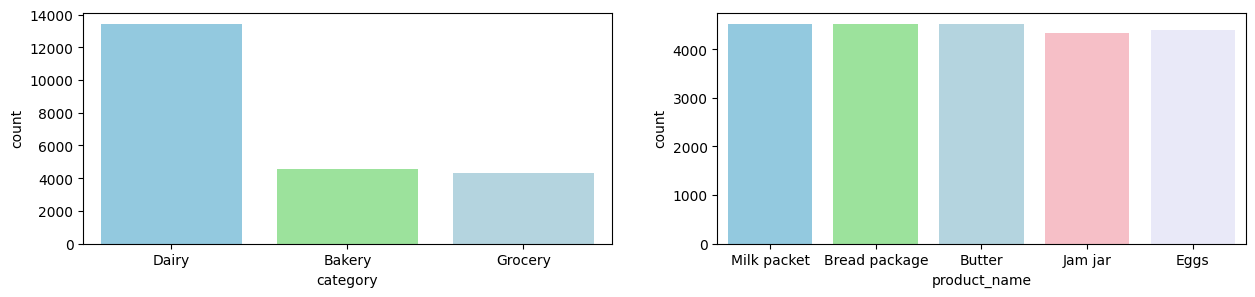

In [10]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(x='category', data=df)
plt.subplot(1,2,2)
sns.countplot(x='product_name', data=df)
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">  Visualize average number of items sold for each category and product.</p>


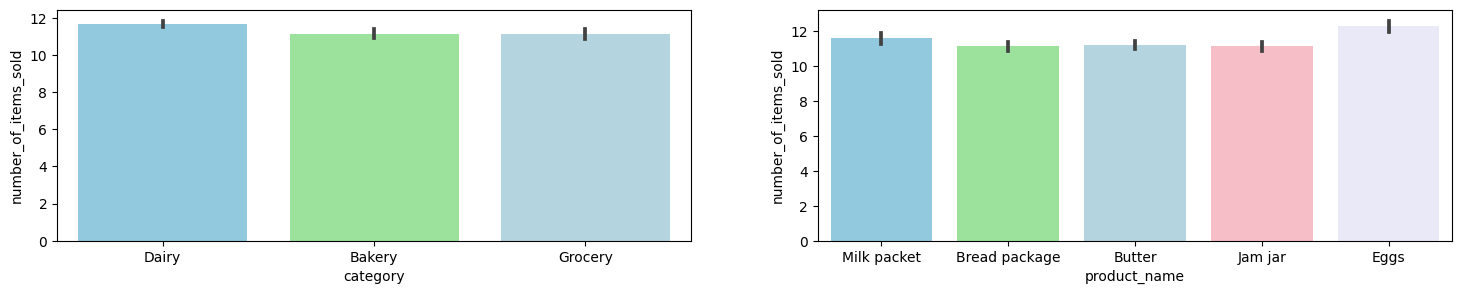

In [11]:
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
sns.barplot(x='category', y='number_of_items_sold', data=df,)
plt.subplot(1,2,2)
sns.barplot(x='product_name', y='number_of_items_sold', data=df)
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold"> Visualize Average number of items sold  and total revenue on each day.</p>

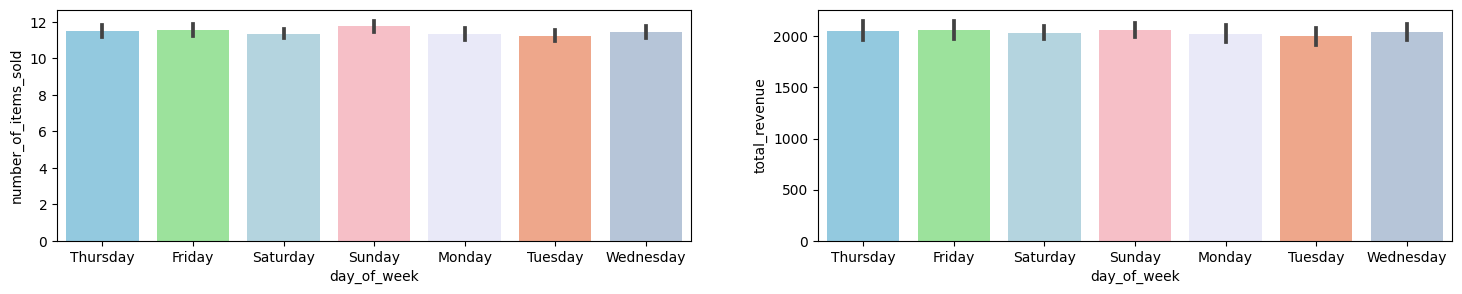

In [12]:
plt.figure(figsize=(18,3))
plt.subplot(1,2,1)
sns.barplot(x='day_of_week', y='number_of_items_sold', data=df)
plt.subplot(1,2,2)
sns.barplot(x='day_of_week', y='total_revenue', data=df)
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold"> Compare the total revenue generated on holidays versus regular days using a bar chart.</p>

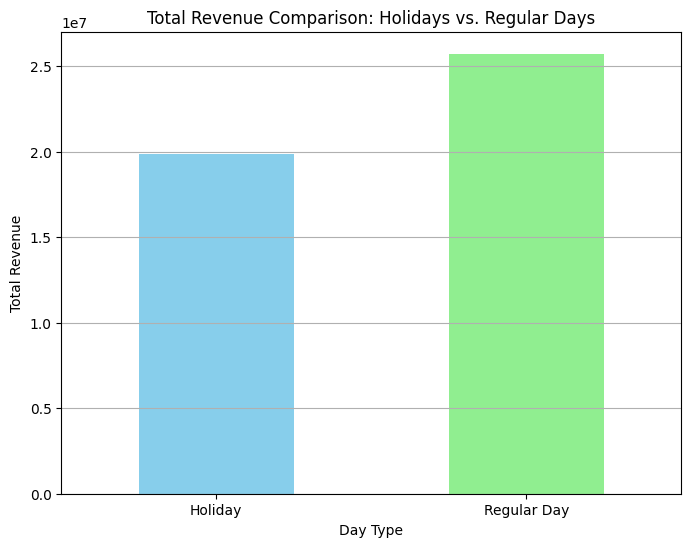

In [13]:
df['is_holiday'] = df['holiday'].map({True: 'Holiday', False: 'Regular Day'})
revenue_by_holiday = df.groupby('is_holiday')['total_revenue'].sum()
plt.figure(figsize=(8, 6))
revenue_by_holiday.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Total Revenue Comparison: Holidays vs. Regular Days')
plt.xlabel('Day Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Visualize the gender distribution of buyers for all products using a pie chart.</p>

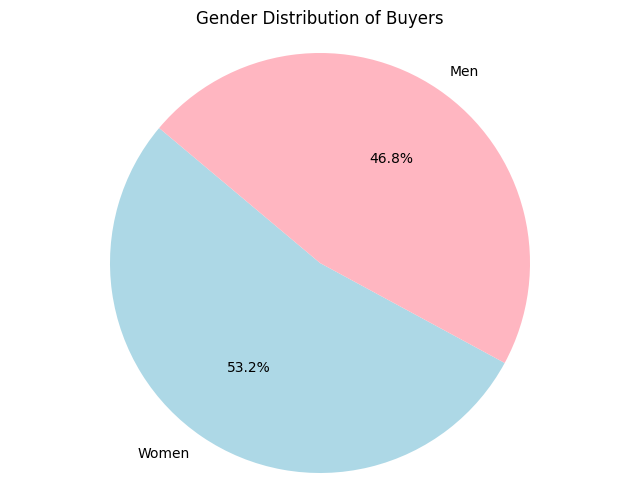

In [14]:
gender_distribution = df['buyer_gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
plt.title('Gender Distribution of Buyers')
plt.axis('equal') 
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Visualizing relation between total revenue and number of items sold.</p>
<p style="font-size: 15px;color: #20BEFF">mark each category and product with different colors using <b>hue<b></p>

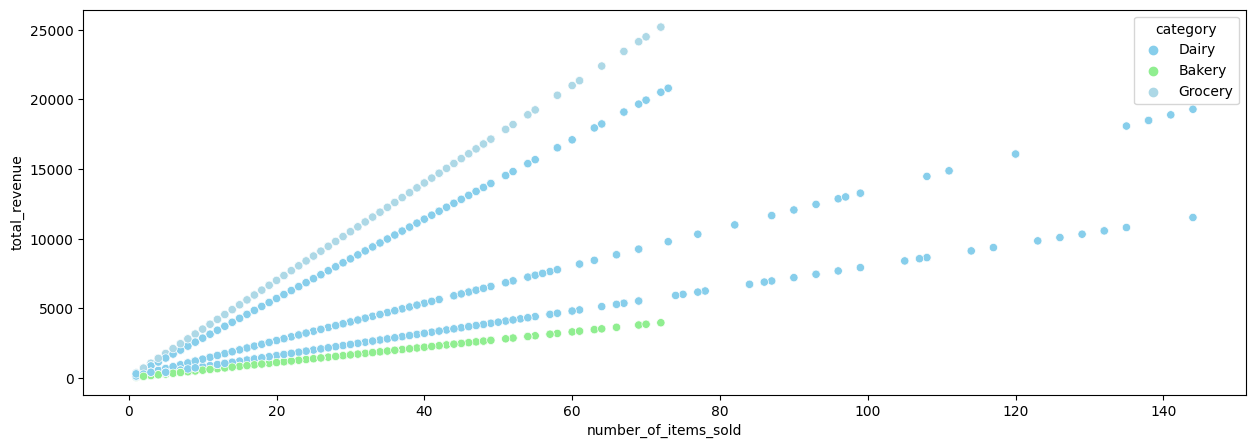

In [15]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='number_of_items_sold', y='total_revenue',hue='category', data=df)
plt.show()

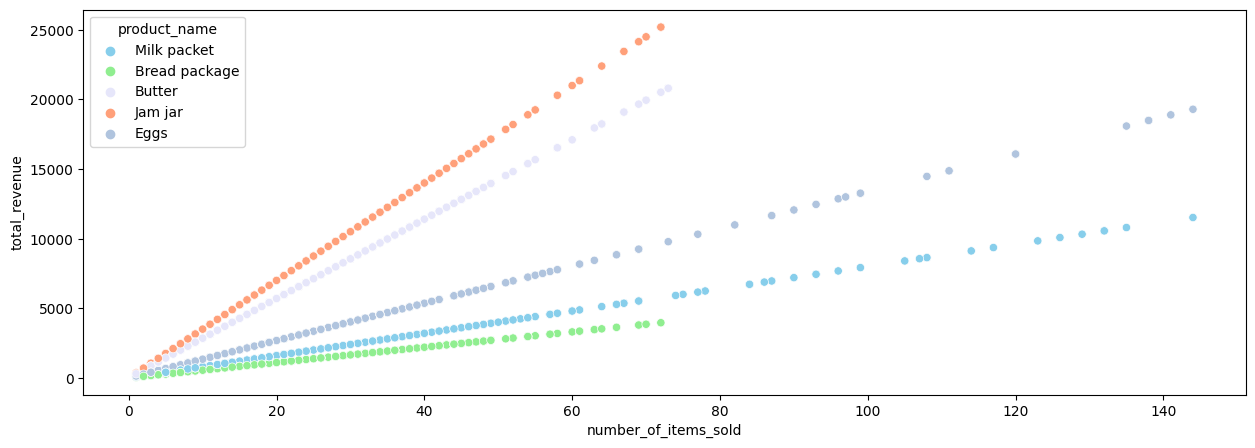

In [16]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='number_of_items_sold', y='total_revenue',hue='product_name', data=df,palette=['skyblue', 'lightgreen', 'lavender', 'lightsalmon','lightsteelblue'])
plt.show()


<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Visualizing distribution of category with number of items sold.</p>

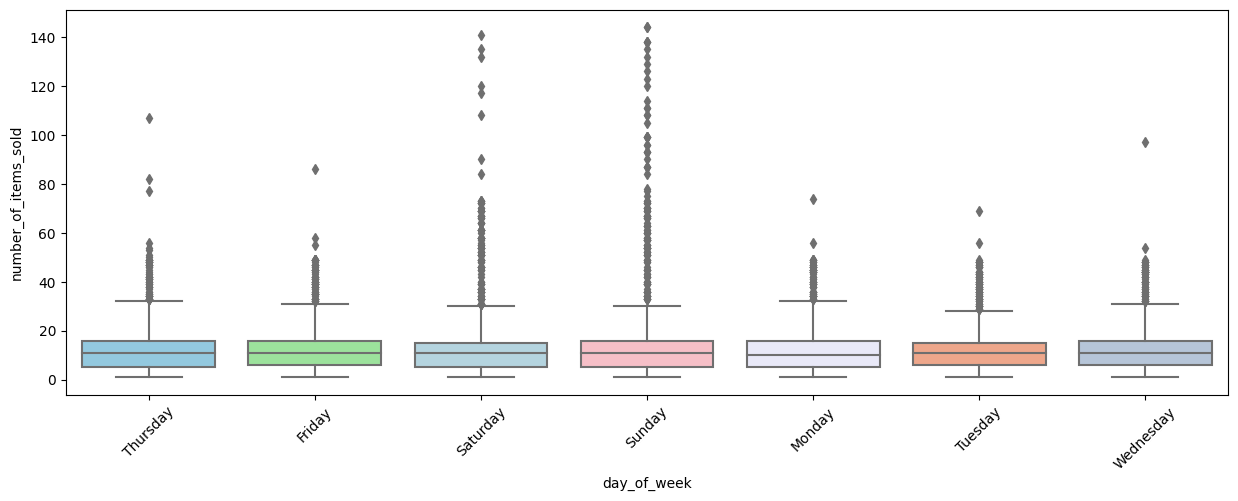

In [17]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='day_of_week', y='number_of_items_sold', data=df)
plt.xticks(rotation=45)
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Visualize average sales by sales hours, months and days.</p>

In [18]:
df['sales_time'].head()

0    07:58
1    12:00
2    19:56
3    09:21
4    07:22
Name: sales_time, dtype: object

In [19]:
df['hours']=df['sales_time'].str.split(":").str[0] ### seperate hour from hour and minutes
df['hours'].head()

0    07
1    12
2    19
3    09
4    07
Name: hours, dtype: object

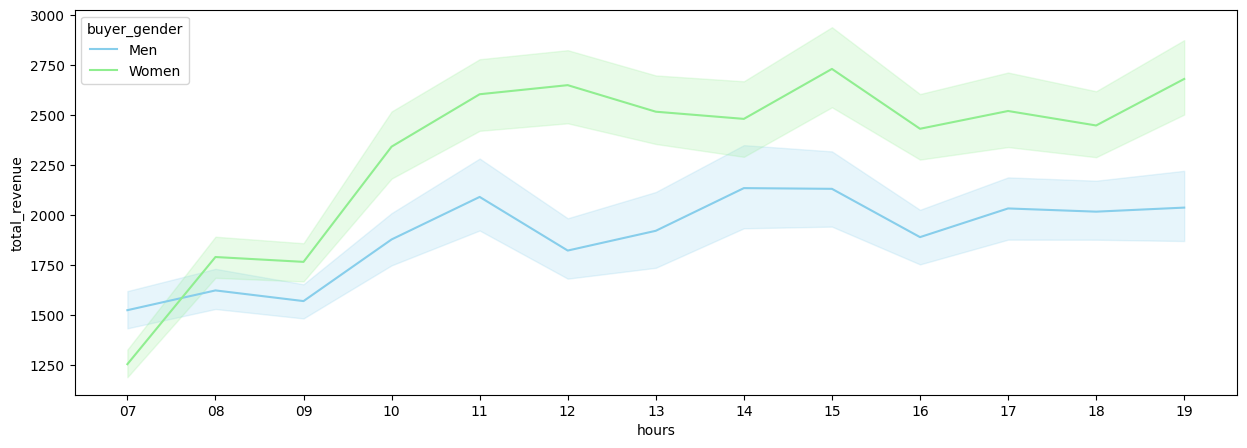

In [20]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='hours',y='total_revenue',data=df.sort_values('hours'),hue='buyer_gender')
plt.show()

In [21]:
df['sales_date'] = df['sales_date'].astype(str)
df[['year', 'month', 'day']] = df['sales_date'].str.split("-", expand=True)
df.head()


,product_name,category,price,sales_date,day_of_week,holiday,number_of_items_sold,total_revenue,sales_time,product_id,buyer_gender,is_holiday,hours,year,month,day
0,Milk packet,Dairy,80,2022-09-01,Thursday,False,18,1440,07:58,1022,Men,Regular Day,07,2022,09,01
1,Bread package,Bakery,55,2022-09-01,Thursday,False,8,440,12:00,1011,Men,Regular Day,12,2022,09,01
2,Butter,Dairy,285,2022-09-01,Thursday,False,15,4275,19:56,1078,Women,Regular Day,19,2022,09,01
3,Milk packet,Dairy,80,2022-09-01,Thursday,False,12,960,09:21,1022,Men,Regular Day,09,2022,09,01
4,Bread package,Bakery,55,2022-09-01,Thursday,False,16,880,07:22,1011,Men,Regular Day,07,2022,09,01


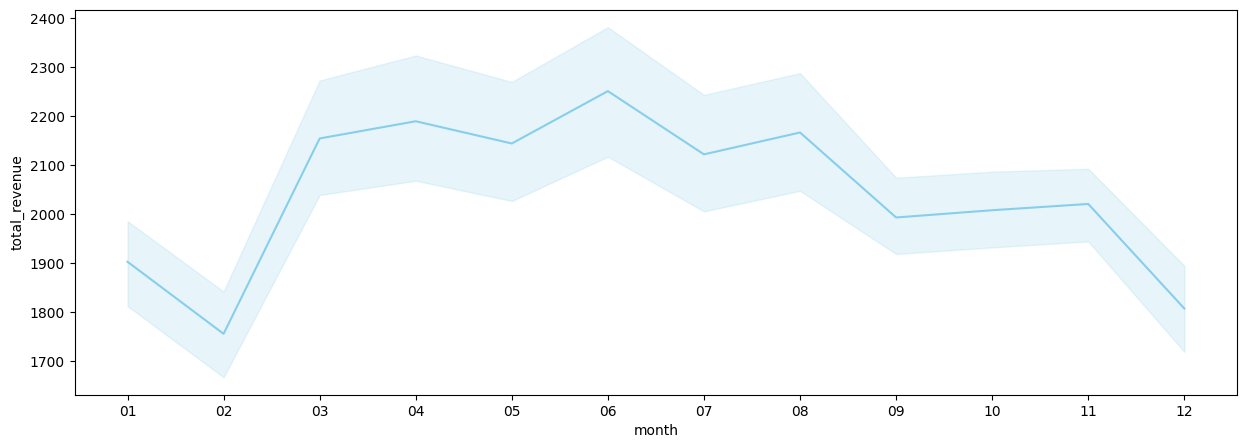

In [22]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='month',y='total_revenue',data=df.sort_values('month'))
plt.show()

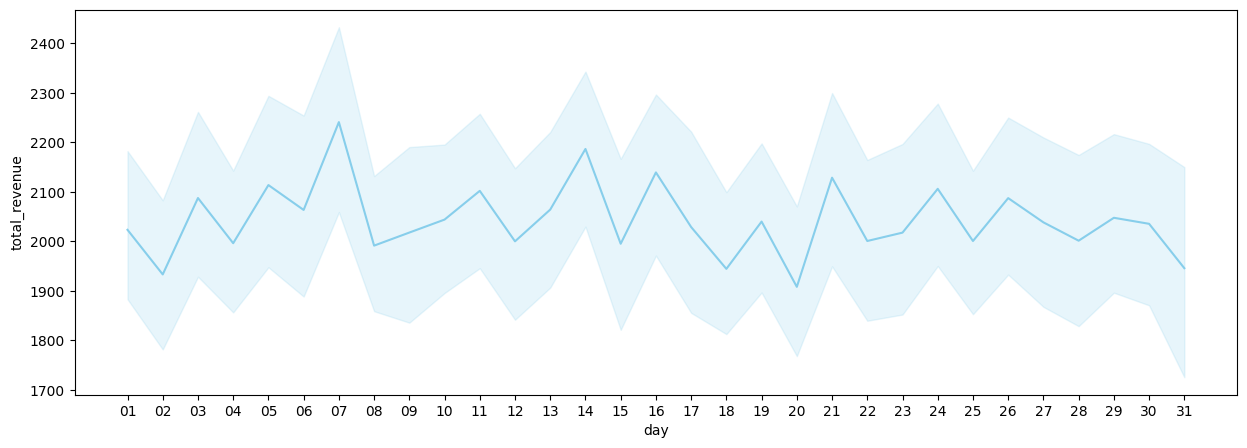

In [23]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='day',y='total_revenue',data=df.sort_values('day'))
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Visualize a line plot illustrating the daily total revenue over the observed period.</p

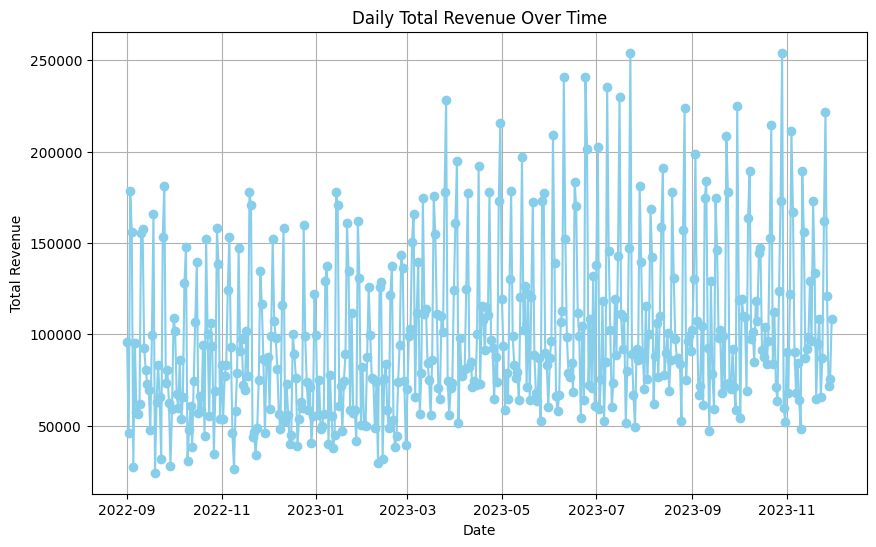

In [24]:
df['sales_date'] = pd.to_datetime(df['sales_date'])
daily_revenue = df.groupby('sales_date')['total_revenue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(daily_revenue.index, daily_revenue.values, color='skyblue', marker='o', linestyle='-')
plt.title('Daily Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Create a scatter plot to explore the relationship between the price of a product and the number of items sold.</p>

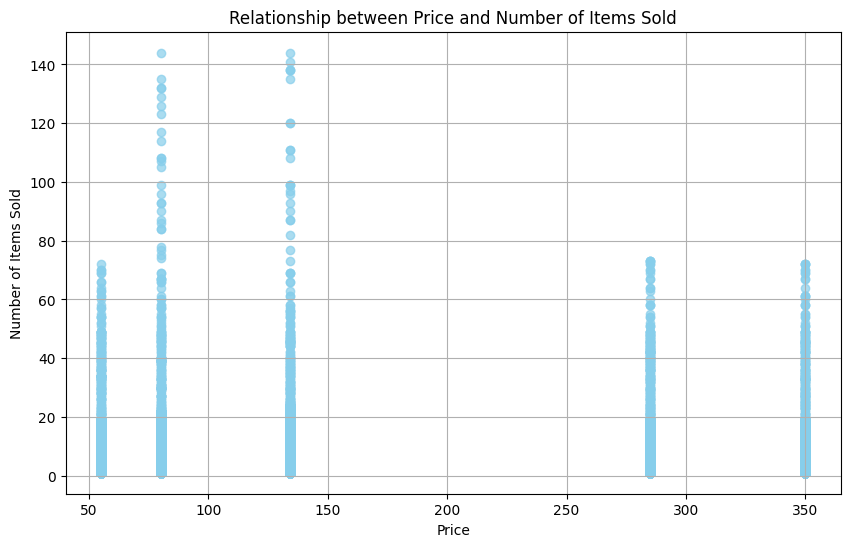

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['number_of_items_sold'], alpha=0.7)
plt.title('Relationship between Price and Number of Items Sold')
plt.xlabel('Price')
plt.ylabel('Number of Items Sold')
plt.grid(True)
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Show the top-selling products based on total revenue using a horizontal bar chart.</p>

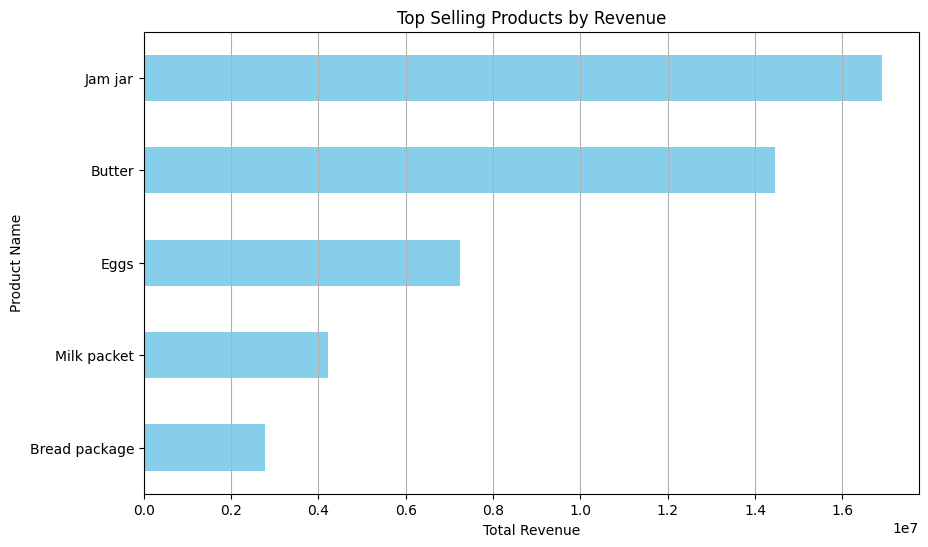

In [26]:
top_selling_products = df.groupby('product_name')['total_revenue'].sum().sort_values(ascending=False)
top_10_products = top_selling_products.head(10)
plt.figure(figsize=(10, 6))
top_10_products.sort_values().plot(kind='barh')
plt.title('Top Selling Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.grid(axis='x')
plt.show()

<p style="font-size: 20px;color: #20BEFF;font-weight: bold">Analyze seasonal effects by plotting the total revenue trend over different months or quarters.</p>

In [27]:
df['month'] = df['sales_date'].dt.month
df['quarter'] = df['sales_date'].dt.quarter
monthly_revenue = df.groupby('month')['total_revenue'].sum()
quarterly_revenue = df.groupby('quarter')['total_revenue'].sum()

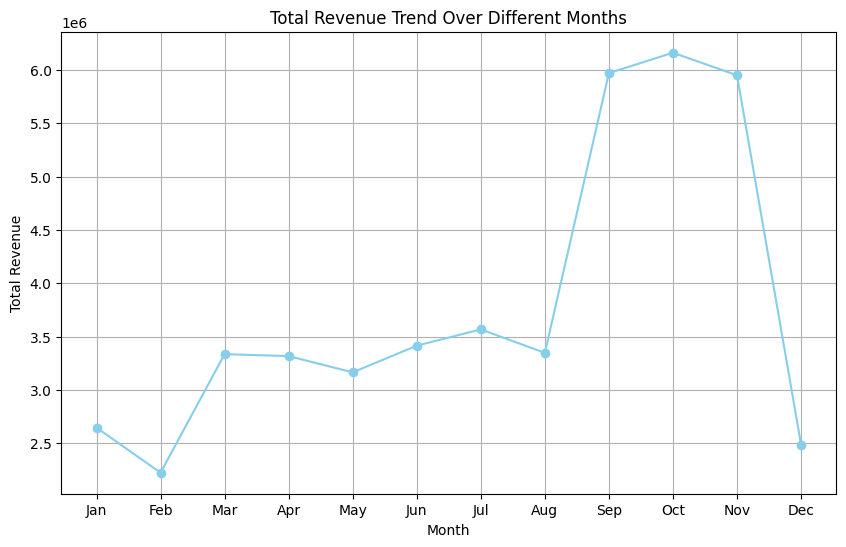

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Total Revenue Trend Over Different Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

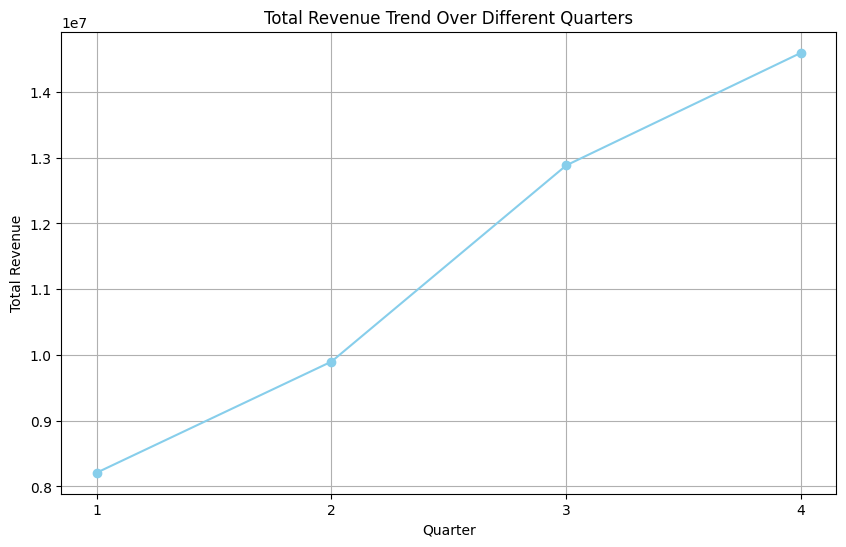

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue.index, quarterly_revenue.values, marker='o', linestyle='-')
plt.title('Total Revenue Trend Over Different Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 5))
plt.grid(True)
plt.show()

<h2 style="margin-bottom: 10px; color: #20BEFF;">Conclusion</h2>